# [Tensorflow](https://www.tensorflow.org/resources/learn-ml?gclid=CjwKCAiAsYyRBhACEiwAkJFKomf2GJWV5JqOTsmgtFZWK5a-jQhgrdl7w9YR-oSXgz-f-SkIY6I1sxoC0E0QAvD_BwE)

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split

import os
import zipfile
import pandas as pd
from glob import glob
import json
import io

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model, load_model
import tensorflow.keras.datasets as tfds

from tensorflow.keras import backend as K
from tensorflow.keras.losses import Loss

from tensorflow.keras.layers import Input, Dense, Conv2D, Flatten, BatchNormalization, Lambda, MaxPooling2D, GlobalAveragePooling1D
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, GRU, Conv1D , Dropout

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from PIL import Image, ImageFont, ImageDraw


## 001. A Simple Model : Hello World with ANNs in TF

In [ ]:
y = np.array([3*i+23 for i in range(10000)])
X = np.array([i for i in range(10000)])

In [ ]:
x = Input(shape=(1,))
o = Dense(units=1024, activation='relu')(x)
o = Dense(units=512, activation='relu')(o)
o = Dense(units=256, activation='relu')(o)
o = Dense(units=128, activation='relu')(o)
o = Dense(units=64, activation='relu')(o)
o = Dense(units=1)(o)
model = Model(inputs=x , outputs=o)
model.compile(loss = 'mse' , optimizer = 'adam', metrics=['mean_squared_error'])

In [ ]:
model.summary()

In [ ]:
tf.keras.backend.clear_session()
r = model.fit(X, y, epochs=100)

In [ ]:
model.predict([4])

## 002. Moving beyond Basics, Computer Vision with ANNs

In [ ]:
fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

In [ ]:
training_images = training_images/255.
test_images = test_images/255.

In [ ]:
training_images.shape

In [ ]:
i = Input(shape=(28,28,))
o = Flatten()(i)
o = Dense(128, activation='relu')(o) 
o = Dense(10, activation='softmax')(o)

model = Model(inputs = i , outputs = o)

model.compile(loss='sparse_categorical_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'])

In [ ]:
tf.keras.backend.clear_session()
r = model.fit(training_images , training_labels , epochs = 10 , validation_data = (test_images, test_labels))

In [ ]:
plt.plot(r.history['accuracy'], color='red' )
plt.plot(r.history['val_accuracy'], color='blue' )

In [ ]:
plt.plot(r.history['loss'], color='red' )
plt.plot(r.history['val_loss'], color='blue' )

In [ ]:
class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') >= 0.8:
            print("\nStopping training as accuracy reached.. ")
            self.model.stop_training = True

In [ ]:
tf.keras.backend.clear_session()
mycall = CustomCallback()
r = model.fit(training_images , training_labels , epochs = 10 , validation_data = (test_images, test_labels),
              callbacks = [mycall]
             )

## 003. Convolution Operation and CNNs

In [ ]:
class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') >= 0.99:
            print("\nStopping training as accuracy reached.. ")
            self.model.stop_training = True
            
mycall = CustomCallback()

fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

i = Input(shape=(28,28,1))
o = Lambda(lambda x: x/255.)(i)

o = Conv2D(32, (3,3) , activation='relu')(o)
o = MaxPooling2D(2,2)(o)
o = Conv2D(32, (3,3) , activation='relu')(o)
o = MaxPooling2D(2,2)(o)

o = Flatten()(o)
o = Dense(128, activation='relu')(o)
o = Dense(10, activation='softmax')(o)

model = Model(inputs = i , outputs = o)

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam' , metrics = ['accuracy'])

tf.keras.backend.clear_session()

r = model.fit(training_images , training_labels , epochs = 10 , validation_data = (test_images, test_labels),
              callbacks = [mycall]
             )



In [ ]:
model.summary()

In [ ]:
plt.plot(r.history['accuracy'], color='red' )
plt.plot(r.history['val_accuracy'], color='blue' )

In [ ]:
plt.plot(r.history['loss'], color='red' )
plt.plot(r.history['val_loss'], color='blue' )

In [ ]:
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

In [ ]:
layer_outputs

In [ ]:
activation_model

## 004. ImageDataGenerator and CNNs

In [ ]:
!gdown --id 1onaG42NZft3wCE1WH0GDEbUhu75fedP5

In [ ]:
ls

In [ ]:
local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')
zip_ref.close()

ls

#### ImageDataGenerator with Training Set only

In [ ]:
class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') >= 0.99:
            print("\nStopping training as accuracy reached.. ")
            self.model.stop_training = True
            
mycall = CustomCallback()

train_horse_dir = os.path.join('./horse-or-human/horses')
train_human_dir = os.path.join('./horse-or-human/humans')

train_horse_names = os.listdir(train_horse_dir)
train_human_names = os.listdir(train_human_dir)

print(len(train_horse_names))
print(len(train_human_names))

batch_size = 8

train_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
        './horse-or-human/',  
        target_size=(300, 300),  
        batch_size=batch_size,
        class_mode='binary')

i = Input(shape=(300,300,3))
o = Conv2D(16, (3,3) , activation='relu')(i)
o = MaxPooling2D(2,2)(o)
o = Flatten()(o)
o = Dense(128, activation='relu')(o)
o = Dense(1, activation='sigmoid')(o)

model = Model(inputs=i, outputs=o)

print(model.summary())

model.compile(loss = 'binary_crossentropy', optimizer = 'adam' , metrics = ['accuracy'])

tf.keras.backend.clear_session()
r = model.fit(
    train_generator,epochs = 8,steps_per_epoch = int((len(train_horse_names) + len(train_human_names))/batch_size),
    callbacks=[mycall])



#### ImageDataGenerator with Train and Test Sets

In [ ]:
local_zip = './validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./validation-horse-or-human')

class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') >= 0.99:
            print("\nStopping training as accuracy reached.. ")
            self.model.stop_training = True
            
mycall = CustomCallback()

train_horse_dir = os.path.join('./horse-or-human/horses')
train_human_dir = os.path.join('./horse-or-human/humans')
validation_horse_dir = os.path.join('./validation-horse-or-human/horses')
validation_human_dir = os.path.join('./validation-horse-or-human/humans')

train_horse_names = os.listdir(train_horse_dir)
train_human_names = os.listdir(train_human_dir)
validation_horse_names = os.listdir(validation_horse_dir)
validation_human_names = os.listdir(validation_human_dir)


print(len(train_horse_names))
print(len(train_human_names))

batch_size = 8

train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
        './horse-or-human/',  
        target_size=(300, 300),  
        batch_size=batch_size,
        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
        './validation-horse-or-human/',  
        target_size=(300, 300),  
        batch_size=batch_size,
        class_mode='binary')

i = Input(shape=(300,300,3))
o = Conv2D(16, (3,3) , activation='relu')(i)
o = MaxPooling2D(2,2)(o)
o = Flatten()(o)
o = Dense(128, activation='relu')(o)
o = Dense(1, activation='sigmoid')(o)

model = Model(inputs=i, outputs=o)

print(model.summary())

model.compile(loss = 'binary_crossentropy', optimizer = 'adam' , metrics = ['accuracy'])

tf.keras.backend.clear_session()
r = model.fit(
    train_generator,
    epochs = 8,
    steps_per_epoch = int((len(train_horse_names) + len(train_human_names))/batch_size),
    validation_data = validation_generator,
    validation_steps = int((len(validation_horse_names) + len(validation_human_names))/batch_size),
    callbacks=[mycall])

In [ ]:
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  
x = img_to_array(img) 
x = x.reshape((1,) + x.shape)  

# Scale by 1/255
x /= 255

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of the plot
layer_names = [layer.name for layer in model.layers[1:]]
print(layer_names)

In [ ]:
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:

    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map

    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    
    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
    
      # Tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

## 005. Data Augmentation + CNNs

In [ ]:
class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') >= 0.99:
            print("\nStopping training as accuracy reached.. ")
            self.model.stop_training = True
            
mycall = CustomCallback()

train_horse_dir = os.path.join('./datasets/horse-or-human/horses')
train_human_dir = os.path.join('./datasets/horse-or-human/humans')
validation_horse_dir = os.path.join('./datasets/validation-horse-or-human/horses')
validation_human_dir = os.path.join('./datasets/validation-horse-or-human/humans')

train_horse_names = os.listdir(train_horse_dir)
train_human_names = os.listdir(train_human_dir)
validation_horse_names = os.listdir(validation_horse_dir)
validation_human_names = os.listdir(validation_human_dir)


print(len(train_horse_names))
print(len(train_human_names))

batch_size = 32

train_datagen = ImageDataGenerator(rescale=1/255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')
validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
        './datasets/horse-or-human/',  
        target_size=(300, 300),  
        batch_size=batch_size,
        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
        './datasets/validation-horse-or-human/',  
        target_size=(300, 300),  
        batch_size=batch_size,
        class_mode='binary')

i = Input(shape=(300,300,3))
o = Conv2D(16, (3,3) , activation='relu')(i)
o = MaxPooling2D(2,2)(o)
o = Flatten()(o)
o = Dense(128, activation='relu')(o)
o = Dense(1, activation='sigmoid')(o)

model = Model(inputs=i, outputs=o)

print(model.summary())

model.compile(loss = 'binary_crossentropy', optimizer = 'adam' , metrics = ['accuracy'])

tf.keras.backend.clear_session()
r = model.fit(
    train_generator,
    epochs = 8,
    steps_per_epoch = int((len(train_horse_names) + len(train_human_names))/batch_size),
    validation_data = validation_generator,
    validation_steps = int((len(validation_horse_names) + len(validation_human_names))/batch_size),
    callbacks=[mycall])

In [ ]:
acc = r.history['accuracy']
val_acc = r.history['val_accuracy']
loss = r.history['loss']
val_loss = r.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## 006. CNN Transfer Learning with Pre-trained Models

### A : Method 1 --> Create the Architecture and then load the weights from an external file

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = './datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

# Initialize the base model.
# Set the input shape and remove the dense layers.
pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = None)

# Load the pre-trained weights you downloaded.
pre_trained_model.load_weights(local_weights_file)

# Freeze the weights of the layers.
for layer in pre_trained_model.layers:
    layer.trainable = False
    
print(pre_trained_model.summary())

In [ ]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (1, activation='sigmoid')(x)           

# Append the dense network to the base model
model = Model(pre_trained_model.input, x) 

# Print the model summary. See your dense network connected at the end.
model.summary()

In [ ]:
model.compile(optimizer = RMSprop(learning_rate=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

In [ ]:
### Rest is same as previous

### B : Method 2 --> Use the pre-trained model from the Tensorflow keras Applications module

In [ ]:
from tensorflow.keras.applications.efficientnet_v2 import EfficientNetV2B0 as  PretrainedModel, preprocess_input


acc_thresh = 0.9
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if(logs.get('accuracy') > acc_thresh):
            print("\nStopping training as desired accuracy reached....")
            self.model.stop_training = True

class TrainingModule(object):
    def __init__(self, root_folder, model_folder, resize_dim = [200,200,3], modelName = "effNetV2B0"):

        self.root_folder = root_folder
        self.IMAGE_SIZE = [200,200]

        self.ptm = PretrainedModel(
        input_shape = self.IMAGE_SIZE + [3],
        weights = 'imagenet',
        include_top = False)

        self.model_folder = model_folder

        self.train_path = os.path.join(root_folder,"train")
        self.test_path = os.path.join(root_folder,"test")

        self.train_image_files = glob(self.train_path + '/*/*')
        self.test_image_files = glob(self.test_path + '/*/*')

        self.folders = glob(self.train_path + "/*")

    def train(self):
        self.ptm.trainable = False
        K = len(self.folders)

        x = Flatten()(self.ptm.output)
        x = Dense(K, activation = 'softmax')(x)

        model = Model(inputs = self.ptm.input , outputs = x)
        
        gen = ImageDataGenerator(
        rotation_range = 20,
        width_shift_range = 0.1,
        height_shift_range = 0.1,
        shear_range = 0.1,
        zoom_range = 0.2,
        horizontal_flip = True,
        preprocessing_function = preprocess_input
        )

        batch_size = 64

        train_generator = gen.flow_from_directory(
            self.train_path,
            shuffle = True,
            target_size = self.IMAGE_SIZE,
            batch_size = batch_size
        )

        test_generator = gen.flow_from_directory(
            self.test_path,
            target_size = self.IMAGE_SIZE,
            batch_size = batch_size
        )

        model.compile(loss = 'categorical_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'])

        self.model_file = os.path.join(self.model_folder, "trained_model.h5")

        try:
            os.mkdir(self.model_folder)
        except:
            pass

        myCall = myCallback()
        
        r = model.fit(
                train_generator,
                validation_data = test_generator,
                epochs = 8,
                steps_per_epoch = int(np.ceil(len(self.train_image_files)/batch_size)),
                validation_steps = int(np.ceil(len(self.test_image_files)/batch_size)),
                callbacks=[myCall]
        )

        model.save(self.model_file)
        print(f"Saving model at {self.model_file}")

tm = TrainingModule("./datasets/fullData" , "./datasets/fullData" )

tm.train()

## 007. Sequence And Tokens Basics With Tensorflow NLP

In [ ]:
sentences = [
    'i love my dog',
    'I, love my cat',
    'You love my dog!'
]

tokenizer = Tokenizer(num_words=100)
tokenizer.fit_on_texts(sentences)

word_index = tokenizer.word_index

print(word_index)

In [ ]:
sentences = [
    'I love my dog',
    'I love my cat',
    'You love my dog!',
    'Do you think my dog is amazing?'
]

tokenizer = Tokenizer(num_words = 100, oov_token="<OOV>")
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(sentences)

padded = pad_sequences(sequences, maxlen=5)
print("\nWord Index = " , word_index)
print("\nSequences = " , sequences)
print("\nPadded Sequences:")
print(padded)


# Try with words that the tokenizer wasn't fit to
test_data = [
    'i really love my dog',
    'my dog loves my manatee'
]

test_seq = tokenizer.texts_to_sequences(test_data)
print("\nTest Sequence = ", test_seq)

padded = pad_sequences(test_seq, maxlen=10)
print("\nPadded Test Sequence: ")
print(padded)

In [ ]:
with open("./datasets/sarcasm.json", 'r') as f:
    datastore = json.load(f)


sentences = [] 
labels = []
urls = []
for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])
    urls.append(item['article_link'])


tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(sentences)

word_index = tokenizer.word_index
print(len(word_index))
print(word_index)

sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences, padding='post')
print(padded[0])
print(padded.shape)

## 008. IMDB Sentiment Analysis

In [10]:
imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)

train_data, test_data = imdb['train'], imdb['test']

training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

for s,l in train_data:
    training_sentences.append(s.numpy().decode('utf8'))
    training_labels.append(l.numpy())
    
for s,l in test_data:
    testing_sentences.append(s.numpy().decode('utf8'))
    testing_labels.append(l.numpy())
    
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)



vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type='post'
oov_tok = "<OOV>"


tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)




reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(padded[3]))
print(training_sentences[3])




model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

num_epochs = 10
model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
    word = reverse_word_index[word_num]
    embeddings = weights[word_num]
    out_m.write(word + "\n")
    out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

## 009. Sarcasm Detection with Anns and Embedding Layers

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           160000    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
625/625 - 2s - loss: 0.6767 - accuracy: 0.5714 - val_loss: 0.6316 - val_accuracy: 0.6493 - 2s/epoch 

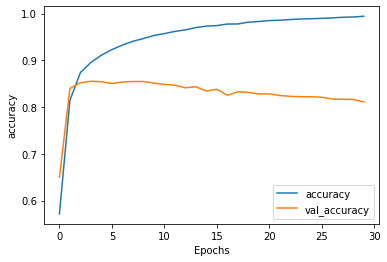

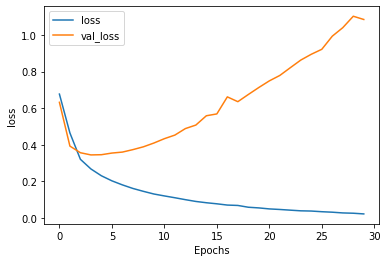

former <OOV> store clerk sues over secret 'black <OOV> for minority shoppers ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
mom starting to fear son's web series closest thing she will have to grandchild
1
(10000, 16)


In [17]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

with open("./datasets/sarcasm.json", 'r') as f:
    datastore = json.load(f)

sentences = []
labels = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])
    


training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)



model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

print(model.summary())

num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")



reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[0]))
print(training_sentences[2])
print(labels[2])




e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()


## 010. LSTMS, GRUs and other Sequence Models

In [ ]:
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

tokenizer = info.features['text'].encoder

BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))



model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

print(model.summary())

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)



In [ ]:
imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)

train_data, test_data = imdb['train'], imdb['test']

training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

# str(s.tonumpy()) is needed in Python3 instead of just s.numpy()
for s,l in train_data:
    training_sentences.append(str(s.numpy()))
    training_labels.append(l.numpy())

for s,l in test_data:
    testing_sentences.append(str(s.numpy()))
    testing_labels.append(l.numpy())

training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type='post'
oov_tok = "<OOV>"


tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(padded[1]))
print(training_sentences[1])

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

num_epochs = 50
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))




# Model Definition with LSTM
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


# Model Definition with Conv1D
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()



## 011. Text Generation with LSTMs

In [19]:
tokenizer = Tokenizer()

data="In the town of Athy one Jeremy Lanigan \n Battered away til he hadnt a pound. \nHis father died and made him a man again \n Left him a farm and ten acres of ground. \nHe gave a grand party for friends and relations \nWho didnt forget him when come to the wall, \nAnd if youll but listen Ill make your eyes glisten \nOf the rows and the ructions of Lanigans Ball. \nMyself to be sure got free invitation, \nFor all the nice girls and boys I might ask, \nAnd just in a minute both friends and relations \nWere dancing round merry as bees round a cask. \nJudy ODaly, that nice little milliner, \nShe tipped me a wink for to give her a call, \nAnd I soon arrived with Peggy McGilligan \nJust in time for Lanigans Ball. \nThere were lashings of punch and wine for the ladies, \nPotatoes and cakes; there was bacon and tea, \nThere were the Nolans, Dolans, OGradys \nCourting the girls and dancing away. \nSongs they went round as plenty as water, \nThe harp that once sounded in Taras old hall,\nSweet Nelly Gray and The Rat Catchers Daughter,\nAll singing together at Lanigans Ball. \nThey were doing all kinds of nonsensical polkas \nAll round the room in a whirligig. \nJulia and I, we banished their nonsense \nAnd tipped them the twist of a reel and a jig. \nAch mavrone, how the girls got all mad at me \nDanced til youd think the ceiling would fall. \nFor I spent three weeks at Brooks Academy \nLearning new steps for Lanigans Ball. \nThree long weeks I spent up in Dublin, \nThree long weeks to learn nothing at all,\n Three long weeks I spent up in Dublin, \nLearning new steps for Lanigans Ball. \nShe stepped out and I stepped in again, \nI stepped out and she stepped in again, \nShe stepped out and I stepped in again, \nLearning new steps for Lanigans Ball. \nBoys were all merry and the girls they were hearty \nAnd danced all around in couples and groups, \nTil an accident happened, young Terrance McCarthy \nPut his right leg through miss Finnertys hoops. \nPoor creature fainted and cried Meelia murther, \nCalled for her brothers and gathered them all. \nCarmody swore that hed go no further \nTil he had satisfaction at Lanigans Ball. \nIn the midst of the row miss Kerrigan fainted, \nHer cheeks at the same time as red as a rose. \nSome of the lads declared she was painted, \nShe took a small drop too much, I suppose. \nHer sweetheart, Ned Morgan, so powerful and able, \nWhen he saw his fair colleen stretched out by the wall, \nTore the left leg from under the table \nAnd smashed all the Chaneys at Lanigans Ball. \nBoys, oh boys, twas then there were runctions. \nMyself got a lick from big Phelim McHugh. \nI soon replied to his introduction \nAnd kicked up a terrible hullabaloo. \nOld Casey, the piper, was near being strangled. \nThey squeezed up his pipes, bellows, chanters and all. \nThe girls, in their ribbons, they got all entangled \nAnd that put an end to Lanigans Ball."

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)



{'and': 1, 'the': 2, 'a': 3, 'in': 4, 'all': 5, 'i': 6, 'for': 7, 'of': 8, 'lanigans': 9, 'ball': 10, 'were': 11, 'at': 12, 'to': 13, 'she': 14, 'stepped': 15, 'his': 16, 'girls': 17, 'as': 18, 'they': 19, 'til': 20, 'he': 21, 'again': 22, 'got': 23, 'boys': 24, 'round': 25, 'that': 26, 'her': 27, 'there': 28, 'three': 29, 'weeks': 30, 'up': 31, 'out': 32, 'him': 33, 'was': 34, 'spent': 35, 'learning': 36, 'new': 37, 'steps': 38, 'long': 39, 'away': 40, 'left': 41, 'friends': 42, 'relations': 43, 'when': 44, 'wall': 45, 'myself': 46, 'nice': 47, 'just': 48, 'dancing': 49, 'merry': 50, 'tipped': 51, 'me': 52, 'soon': 53, 'time': 54, 'old': 55, 'their': 56, 'them': 57, 'danced': 58, 'dublin': 59, 'an': 60, 'put': 61, 'leg': 62, 'miss': 63, 'fainted': 64, 'from': 65, 'town': 66, 'athy': 67, 'one': 68, 'jeremy': 69, 'lanigan': 70, 'battered': 71, 'hadnt': 72, 'pound': 73, 'father': 74, 'died': 75, 'made': 76, 'man': 77, 'farm': 78, 'ten': 79, 'acres': 80, 'ground': 81, 'gave': 82, 'grand':

In [20]:
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)


In [22]:
model = tf.keras.models.Sequential()
model.add(Embedding(total_words, 64, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(20)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(xs, ys, epochs=500, verbose=1)



Epoch 1/500
15/15 [==============================] - 4s 7ms/step - loss: 5.5696 - accuracy: 0.0110
Epoch 2/500
15/15 [==============================] - 0s 6ms/step - loss: 5.5473 - accuracy: 0.0486
Epoch 3/500
15/15 [==============================] - 0s 6ms/step - loss: 5.4978 - accuracy: 0.0309
Epoch 4/500
15/15 [==============================] - 0s 7ms/step - loss: 5.3372 - accuracy: 0.0486
Epoch 5/500
15/15 [==============================] - 0s 7ms/step - loss: 5.1438 - accuracy: 0.0508
Epoch 6/500
15/15 [==============================] - 0s 7ms/step - loss: 5.0700 - accuracy: 0.0508
Epoch 7/500
15/15 [==============================] - 0s 7ms/step - loss: 5.0328 - accuracy: 0.0508
Epoch 8/500
15/15 [==============================] - 0s 7ms/step - loss: 5.0037 - accuracy: 0.0508
Epoch 9/500
15/15 [==============================] - 0s 6ms/step - loss: 4.9730 - accuracy: 0.0486
Epoch 10/500
15/15 [==============================] - 0s 7ms/step - loss: 4.9403 - accuracy: 0.0530
Epoch 11/

15/15 [==============================] - 0s 8ms/step - loss: 2.1818 - accuracy: 0.6026
Epoch 84/500
15/15 [==============================] - 0s 7ms/step - loss: 2.1573 - accuracy: 0.6247
Epoch 85/500
15/15 [==============================] - 0s 7ms/step - loss: 2.1252 - accuracy: 0.6181
Epoch 86/500
15/15 [==============================] - 0s 7ms/step - loss: 2.1060 - accuracy: 0.6380
Epoch 87/500
15/15 [==============================] - 0s 7ms/step - loss: 2.0761 - accuracy: 0.6336
Epoch 88/500
15/15 [==============================] - 0s 7ms/step - loss: 2.0496 - accuracy: 0.6424
Epoch 89/500
15/15 [==============================] - 0s 7ms/step - loss: 2.0237 - accuracy: 0.6358
Epoch 90/500
15/15 [==============================] - 0s 8ms/step - loss: 2.0023 - accuracy: 0.6446
Epoch 91/500
15/15 [==============================] - 0s 7ms/step - loss: 1.9811 - accuracy: 0.6512
Epoch 92/500
15/15 [==============================] - 0s 7ms/step - loss: 1.9570 - accuracy: 0.6711
Epoch 93/500


15/15 [==============================] - 0s 7ms/step - loss: 0.3921 - accuracy: 0.9492
Epoch 246/500
15/15 [==============================] - 0s 7ms/step - loss: 0.3895 - accuracy: 0.9492
Epoch 247/500
15/15 [==============================] - 0s 7ms/step - loss: 0.3867 - accuracy: 0.9514
Epoch 248/500
15/15 [==============================] - 0s 8ms/step - loss: 0.3849 - accuracy: 0.9470
Epoch 249/500
15/15 [==============================] - 0s 7ms/step - loss: 0.3804 - accuracy: 0.9492
Epoch 250/500
15/15 [==============================] - 0s 7ms/step - loss: 0.3766 - accuracy: 0.9492
Epoch 251/500
15/15 [==============================] - 0s 7ms/step - loss: 0.3743 - accuracy: 0.9448
Epoch 252/500
15/15 [==============================] - 0s 8ms/step - loss: 0.3710 - accuracy: 0.9470
Epoch 253/500
15/15 [==============================] - 0s 6ms/step - loss: 0.3675 - accuracy: 0.9470
Epoch 254/500
15/15 [==============================] - 0s 6ms/step - loss: 0.3649 - accuracy: 0.9448
Epoc

15/15 [==============================] - 0s 7ms/step - loss: 0.1617 - accuracy: 0.9514
Epoch 408/500
15/15 [==============================] - 0s 6ms/step - loss: 0.1599 - accuracy: 0.9514
Epoch 409/500
15/15 [==============================] - 0s 6ms/step - loss: 0.1595 - accuracy: 0.9470
Epoch 410/500
15/15 [==============================] - 0s 6ms/step - loss: 0.1583 - accuracy: 0.9514
Epoch 411/500
15/15 [==============================] - 0s 7ms/step - loss: 0.1564 - accuracy: 0.9492
Epoch 412/500
15/15 [==============================] - 0s 6ms/step - loss: 0.1572 - accuracy: 0.9492
Epoch 413/500
15/15 [==============================] - 0s 7ms/step - loss: 0.1550 - accuracy: 0.9514
Epoch 414/500
15/15 [==============================] - 0s 6ms/step - loss: 0.1537 - accuracy: 0.9492
Epoch 415/500
15/15 [==============================] - 0s 6ms/step - loss: 0.1533 - accuracy: 0.9492
Epoch 416/500
15/15 [==============================] - 0s 7ms/step - loss: 0.1527 - accuracy: 0.9492
Epoc

In [24]:
seed_text = "Laurence went to dublin"
next_words = 100
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict(token_list, verbose=0)
    predicted = np.argmax(predicted, axis = 1)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

Laurence went to dublin round the piper red as got free phelim mchugh fall hall mchugh mchugh eyes again again murther academy murther then entangled entangled entangled entangled them weeks at friends again again was eyes again murther murther academy of painted eyes again again murther suppose murther murther cried finnertys hoops hoops hoops eyes again murther murther murther murther eyes again again murther murther suppose time entangled fainted fainted fainted and the and rat catchers daughter daughter daughter daughter eyes murther glisten again murther murther relations boys entangled entangled entangled them weeks at at brooks academy academy academy academy tea academy same time


## 012. Multi Output Model Example

In [2]:
def format_output(data):
    y1 = data.pop('Y1')
    y1 = np.array(y1)
    y2 = data.pop('Y2')
    y2 = np.array(y2)
    return y1, y2


def norm(x):
    return (x - train_stats['mean']) / train_stats['std']


def plot_diff(y_true, y_pred, title=''):
    plt.scatter(y_true, y_pred)
    plt.title(title)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.axis('equal')
    plt.axis('square')
    plt.xlim(plt.xlim())
    plt.ylim(plt.ylim())
    plt.plot([-100, 100], [-100, 100])
    plt.show()


def plot_metrics(metric_name, title, ylim=5):
    plt.title(title)
    plt.ylim(0, ylim)
    plt.plot(history.history[metric_name], color='blue', label=metric_name)
    plt.plot(history.history['val_' + metric_name], color='green', label='val_' + metric_name)
    plt.show()
    
# Specify data URI
URI = './datasets/ENB2012_data.csv'

# Use pandas excel reader
df = pd.read_csv(URI).sample(frac=1).reset_index(drop=True)

# Split the data into train and test with 80 train / 20 test
train, test = train_test_split(df, test_size=0.2)
train_stats = train.describe()

# Get Y1 and Y2 as the 2 outputs and format them as np arrays
train_stats.pop('Y1')
train_stats.pop('Y2')
train_stats = train_stats.transpose()
train_Y = format_output(train)
test_Y = format_output(test)

# Normalize the training and test data
norm_train_X = norm(train)
norm_test_X = norm(test)

In [3]:
train_stats

,count,mean,std,min,25%,50%,75%,max
X1,614.0,0.764853,0.105942,0.62,0.66,0.74,0.86,0.98
X2,614.0,671.116450,87.955001,514.50,588.00,686.00,759.50,808.50
X3,614.0,317.023616,42.177989,245.00,294.00,318.50,343.00,416.50
X4,614.0,177.046417,45.027401,110.25,147.00,220.50,220.50,220.50
X5,614.0,5.238599,1.751390,3.50,3.50,3.50,7.00,7.00
X6,614.0,3.483713,1.112979,2.00,2.00,4.00,4.00,5.00
X7,614.0,0.232980,0.133589,0.00,0.10,0.25,0.40,0.40
X8,614.0,2.768730,1.541783,0.00,1.00,3.00,4.00,5.00


In [4]:
# Define model layers.
input_layer = Input(shape=(len(train .columns)))
first_dense = Dense(units='128', activation='relu', name='d1')(input_layer)
second_dense = Dense(units='128', activation='relu', name='d2')(first_dense)

# Y1 output will be fed directly from the second dense
y1_output = Dense(units='1', name='y1_output')(second_dense)
third_dense = Dense(units='64', activation='relu', name='d3')(second_dense)

# Y2 output will come via the third dense
y2_output = Dense(units='1', name='y2_output')(third_dense)

# Define the model with the input layer and a list of output layers
model = Model(inputs=input_layer, outputs=[y1_output, y2_output])

print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 d1 (Dense)                     (None, 128)          1152        ['input_1[0][0]']                
                                                                                                  
 d2 (Dense)                     (None, 128)          16512       ['d1[0][0]']                     
                                                                                                  
 d3 (Dense)                     (None, 64)           8256        ['d2[0][0]']                     
                                                                                              

In [6]:
tf.keras.utils.plot_model(model,  show_shapes=True)


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [8]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss={'y1_output': 'mse', 'y2_output': 'mse'},
              metrics={'y1_output': tf.keras.metrics.RootMeanSquaredError(),
                       'y2_output': tf.keras.metrics.RootMeanSquaredError()})

In [9]:
# Train the model for 500 epochs
history = model.fit(norm_train_X, train_Y,
                    epochs=500, batch_size=10, validation_data=(norm_test_X, test_Y))

Epoch 1/500
62/62 [==============================] - 1s 5ms/step - loss: 243.5389 - y1_output_loss: 121.1142 - y2_output_loss: 122.4246 - y1_output_root_mean_squared_error: 11.0052 - y2_output_root_mean_squared_error: 11.0646 - val_loss: 43.0810 - val_y1_output_loss: 15.9930 - val_y2_output_loss: 27.0880 - val_y1_output_root_mean_squared_error: 3.9991 - val_y2_output_root_mean_squared_error: 5.2046
Epoch 2/500
62/62 [==============================] - 0s 2ms/step - loss: 28.4914 - y1_output_loss: 12.0022 - y2_output_loss: 16.4893 - y1_output_root_mean_squared_error: 3.4644 - y2_output_root_mean_squared_error: 4.0607 - val_loss: 130.9930 - val_y1_output_loss: 29.3853 - val_y2_output_loss: 101.6077 - val_y1_output_root_mean_squared_error: 5.4208 - val_y2_output_root_mean_squared_error: 10.0801
Epoch 3/500
62/62 [==============================] - 0s 2ms/step - loss: 30.5002 - y1_output_loss: 10.9373 - y2_output_loss: 19.5629 - y1_output_root_mean_squared_error: 3.3072 - y2_output_root_mean

Epoch 22/500
62/62 [==============================] - 0s 2ms/step - loss: 17.0736 - y1_output_loss: 5.7777 - y2_output_loss: 11.2959 - y1_output_root_mean_squared_error: 2.4037 - y2_output_root_mean_squared_error: 3.3609 - val_loss: 19.9266 - val_y1_output_loss: 5.6553 - val_y2_output_loss: 14.2713 - val_y1_output_root_mean_squared_error: 2.3781 - val_y2_output_root_mean_squared_error: 3.7777
Epoch 23/500
62/62 [==============================] - 0s 2ms/step - loss: 12.9775 - y1_output_loss: 4.9126 - y2_output_loss: 8.0649 - y1_output_root_mean_squared_error: 2.2164 - y2_output_root_mean_squared_error: 2.8399 - val_loss: 25.0458 - val_y1_output_loss: 8.0825 - val_y2_output_loss: 16.9634 - val_y1_output_root_mean_squared_error: 2.8430 - val_y2_output_root_mean_squared_error: 4.1187
Epoch 24/500
62/62 [==============================] - 0s 2ms/step - loss: 12.8063 - y1_output_loss: 4.9658 - y2_output_loss: 7.8405 - y1_output_root_mean_squared_error: 2.2284 - y2_output_root_mean_squared_err

Epoch 43/500
62/62 [==============================] - 0s 2ms/step - loss: 10.4283 - y1_output_loss: 3.3111 - y2_output_loss: 7.1171 - y1_output_root_mean_squared_error: 1.8196 - y2_output_root_mean_squared_error: 2.6678 - val_loss: 21.7290 - val_y1_output_loss: 5.6332 - val_y2_output_loss: 16.0958 - val_y1_output_root_mean_squared_error: 2.3734 - val_y2_output_root_mean_squared_error: 4.0120
Epoch 44/500
62/62 [==============================] - 0s 2ms/step - loss: 7.0003 - y1_output_loss: 2.2734 - y2_output_loss: 4.7269 - y1_output_root_mean_squared_error: 1.5078 - y2_output_root_mean_squared_error: 2.1741 - val_loss: 7.5408 - val_y1_output_loss: 2.6195 - val_y2_output_loss: 4.9214 - val_y1_output_root_mean_squared_error: 1.6185 - val_y2_output_root_mean_squared_error: 2.2184
Epoch 45/500
62/62 [==============================] - 0s 2ms/step - loss: 7.4633 - y1_output_loss: 2.4807 - y2_output_loss: 4.9826 - y1_output_root_mean_squared_error: 1.5750 - y2_output_root_mean_squared_error: 2

Epoch 64/500
62/62 [==============================] - 0s 2ms/step - loss: 8.1752 - y1_output_loss: 2.6236 - y2_output_loss: 5.5516 - y1_output_root_mean_squared_error: 1.6198 - y2_output_root_mean_squared_error: 2.3562 - val_loss: 29.1747 - val_y1_output_loss: 8.6154 - val_y2_output_loss: 20.5592 - val_y1_output_root_mean_squared_error: 2.9352 - val_y2_output_root_mean_squared_error: 4.5342
Epoch 65/500
62/62 [==============================] - 0s 2ms/step - loss: 7.1130 - y1_output_loss: 2.0433 - y2_output_loss: 5.0697 - y1_output_root_mean_squared_error: 1.4294 - y2_output_root_mean_squared_error: 2.2516 - val_loss: 13.4573 - val_y1_output_loss: 5.3117 - val_y2_output_loss: 8.1455 - val_y1_output_root_mean_squared_error: 2.3047 - val_y2_output_root_mean_squared_error: 2.8540
Epoch 66/500
62/62 [==============================] - 0s 2ms/step - loss: 5.9082 - y1_output_loss: 1.6313 - y2_output_loss: 4.2769 - y1_output_root_mean_squared_error: 1.2772 - y2_output_root_mean_squared_error: 2

Epoch 85/500
62/62 [==============================] - 0s 2ms/step - loss: 3.1072 - y1_output_loss: 0.7807 - y2_output_loss: 2.3265 - y1_output_root_mean_squared_error: 0.8836 - y2_output_root_mean_squared_error: 1.5253 - val_loss: 4.0628 - val_y1_output_loss: 0.8358 - val_y2_output_loss: 3.2269 - val_y1_output_root_mean_squared_error: 0.9142 - val_y2_output_root_mean_squared_error: 1.7964
Epoch 86/500
62/62 [==============================] - 0s 2ms/step - loss: 3.2529 - y1_output_loss: 0.7072 - y2_output_loss: 2.5458 - y1_output_root_mean_squared_error: 0.8409 - y2_output_root_mean_squared_error: 1.5955 - val_loss: 8.4850 - val_y1_output_loss: 1.6681 - val_y2_output_loss: 6.8168 - val_y1_output_root_mean_squared_error: 1.2916 - val_y2_output_root_mean_squared_error: 2.6109
Epoch 87/500
62/62 [==============================] - 0s 2ms/step - loss: 3.2008 - y1_output_loss: 0.8356 - y2_output_loss: 2.3652 - y1_output_root_mean_squared_error: 0.9141 - y2_output_root_mean_squared_error: 1.53

Epoch 106/500
62/62 [==============================] - 0s 2ms/step - loss: 3.9462 - y1_output_loss: 1.0626 - y2_output_loss: 2.8836 - y1_output_root_mean_squared_error: 1.0308 - y2_output_root_mean_squared_error: 1.6981 - val_loss: 12.5109 - val_y1_output_loss: 4.8225 - val_y2_output_loss: 7.6884 - val_y1_output_root_mean_squared_error: 2.1960 - val_y2_output_root_mean_squared_error: 2.7728
Epoch 107/500
62/62 [==============================] - 0s 2ms/step - loss: 3.1445 - y1_output_loss: 0.8530 - y2_output_loss: 2.2915 - y1_output_root_mean_squared_error: 0.9236 - y2_output_root_mean_squared_error: 1.5138 - val_loss: 4.9508 - val_y1_output_loss: 1.4257 - val_y2_output_loss: 3.5251 - val_y1_output_root_mean_squared_error: 1.1940 - val_y2_output_root_mean_squared_error: 1.8775
Epoch 108/500
62/62 [==============================] - 0s 2ms/step - loss: 2.4376 - y1_output_loss: 0.5739 - y2_output_loss: 1.8637 - y1_output_root_mean_squared_error: 0.7575 - y2_output_root_mean_squared_error: 

Epoch 127/500
62/62 [==============================] - 0s 2ms/step - loss: 1.8098 - y1_output_loss: 0.3964 - y2_output_loss: 1.4135 - y1_output_root_mean_squared_error: 0.6296 - y2_output_root_mean_squared_error: 1.1889 - val_loss: 5.0642 - val_y1_output_loss: 0.4411 - val_y2_output_loss: 4.6230 - val_y1_output_root_mean_squared_error: 0.6642 - val_y2_output_root_mean_squared_error: 2.1501
Epoch 128/500
62/62 [==============================] - 0s 2ms/step - loss: 2.3008 - y1_output_loss: 0.5015 - y2_output_loss: 1.7993 - y1_output_root_mean_squared_error: 0.7082 - y2_output_root_mean_squared_error: 1.3414 - val_loss: 4.1865 - val_y1_output_loss: 1.4695 - val_y2_output_loss: 2.7170 - val_y1_output_root_mean_squared_error: 1.2122 - val_y2_output_root_mean_squared_error: 1.6483
Epoch 129/500
62/62 [==============================] - 0s 2ms/step - loss: 2.0894 - y1_output_loss: 0.5226 - y2_output_loss: 1.5668 - y1_output_root_mean_squared_error: 0.7229 - y2_output_root_mean_squared_error: 1

Epoch 148/500
62/62 [==============================] - 0s 2ms/step - loss: 1.6458 - y1_output_loss: 0.4081 - y2_output_loss: 1.2377 - y1_output_root_mean_squared_error: 0.6389 - y2_output_root_mean_squared_error: 1.1125 - val_loss: 7.3027 - val_y1_output_loss: 1.1632 - val_y2_output_loss: 6.1395 - val_y1_output_root_mean_squared_error: 1.0785 - val_y2_output_root_mean_squared_error: 2.4778
Epoch 149/500
62/62 [==============================] - 0s 2ms/step - loss: 4.2699 - y1_output_loss: 1.0576 - y2_output_loss: 3.2123 - y1_output_root_mean_squared_error: 1.0284 - y2_output_root_mean_squared_error: 1.7923 - val_loss: 2.6879 - val_y1_output_loss: 0.6722 - val_y2_output_loss: 2.0157 - val_y1_output_root_mean_squared_error: 0.8199 - val_y2_output_root_mean_squared_error: 1.4198
Epoch 150/500
62/62 [==============================] - 0s 2ms/step - loss: 3.7832 - y1_output_loss: 1.0487 - y2_output_loss: 2.7345 - y1_output_root_mean_squared_error: 1.0241 - y2_output_root_mean_squared_error: 1

Epoch 169/500
62/62 [==============================] - 0s 2ms/step - loss: 1.5047 - y1_output_loss: 0.3443 - y2_output_loss: 1.1604 - y1_output_root_mean_squared_error: 0.5868 - y2_output_root_mean_squared_error: 1.0772 - val_loss: 2.5852 - val_y1_output_loss: 0.6763 - val_y2_output_loss: 1.9089 - val_y1_output_root_mean_squared_error: 0.8224 - val_y2_output_root_mean_squared_error: 1.3816
Epoch 170/500
62/62 [==============================] - 0s 2ms/step - loss: 1.4170 - y1_output_loss: 0.3120 - y2_output_loss: 1.1050 - y1_output_root_mean_squared_error: 0.5585 - y2_output_root_mean_squared_error: 1.0512 - val_loss: 2.7143 - val_y1_output_loss: 0.6168 - val_y2_output_loss: 2.0975 - val_y1_output_root_mean_squared_error: 0.7854 - val_y2_output_root_mean_squared_error: 1.4483
Epoch 171/500
62/62 [==============================] - 0s 2ms/step - loss: 1.4133 - y1_output_loss: 0.3192 - y2_output_loss: 1.0941 - y1_output_root_mean_squared_error: 0.5650 - y2_output_root_mean_squared_error: 1

Epoch 190/500
62/62 [==============================] - 0s 2ms/step - loss: 1.4313 - y1_output_loss: 0.3304 - y2_output_loss: 1.1009 - y1_output_root_mean_squared_error: 0.5748 - y2_output_root_mean_squared_error: 1.0492 - val_loss: 1.5370 - val_y1_output_loss: 0.2961 - val_y2_output_loss: 1.2408 - val_y1_output_root_mean_squared_error: 0.5442 - val_y2_output_root_mean_squared_error: 1.1139
Epoch 191/500
62/62 [==============================] - 0s 2ms/step - loss: 1.7566 - y1_output_loss: 0.3541 - y2_output_loss: 1.4025 - y1_output_root_mean_squared_error: 0.5951 - y2_output_root_mean_squared_error: 1.1843 - val_loss: 1.8475 - val_y1_output_loss: 0.4172 - val_y2_output_loss: 1.4303 - val_y1_output_root_mean_squared_error: 0.6459 - val_y2_output_root_mean_squared_error: 1.1959
Epoch 192/500
62/62 [==============================] - 0s 2ms/step - loss: 1.1606 - y1_output_loss: 0.2905 - y2_output_loss: 0.8701 - y1_output_root_mean_squared_error: 0.5390 - y2_output_root_mean_squared_error: 0

Epoch 211/500
62/62 [==============================] - 0s 2ms/step - loss: 1.3323 - y1_output_loss: 0.2677 - y2_output_loss: 1.0646 - y1_output_root_mean_squared_error: 0.5174 - y2_output_root_mean_squared_error: 1.0318 - val_loss: 1.5807 - val_y1_output_loss: 0.3451 - val_y2_output_loss: 1.2356 - val_y1_output_root_mean_squared_error: 0.5874 - val_y2_output_root_mean_squared_error: 1.1116
Epoch 212/500
62/62 [==============================] - 0s 2ms/step - loss: 1.1101 - y1_output_loss: 0.2088 - y2_output_loss: 0.9013 - y1_output_root_mean_squared_error: 0.4569 - y2_output_root_mean_squared_error: 0.9494 - val_loss: 2.2304 - val_y1_output_loss: 0.6909 - val_y2_output_loss: 1.5395 - val_y1_output_root_mean_squared_error: 0.8312 - val_y2_output_root_mean_squared_error: 1.2408
Epoch 213/500
62/62 [==============================] - 0s 2ms/step - loss: 1.2087 - y1_output_loss: 0.2202 - y2_output_loss: 0.9885 - y1_output_root_mean_squared_error: 0.4692 - y2_output_root_mean_squared_error: 0

Epoch 232/500
62/62 [==============================] - 0s 2ms/step - loss: 0.9885 - y1_output_loss: 0.1999 - y2_output_loss: 0.7886 - y1_output_root_mean_squared_error: 0.4471 - y2_output_root_mean_squared_error: 0.8880 - val_loss: 2.8404 - val_y1_output_loss: 0.5396 - val_y2_output_loss: 2.3009 - val_y1_output_root_mean_squared_error: 0.7345 - val_y2_output_root_mean_squared_error: 1.5169
Epoch 233/500
62/62 [==============================] - 0s 2ms/step - loss: 1.4819 - y1_output_loss: 0.3489 - y2_output_loss: 1.1331 - y1_output_root_mean_squared_error: 0.5906 - y2_output_root_mean_squared_error: 1.0645 - val_loss: 1.4831 - val_y1_output_loss: 0.3116 - val_y2_output_loss: 1.1716 - val_y1_output_root_mean_squared_error: 0.5582 - val_y2_output_root_mean_squared_error: 1.0824
Epoch 234/500
62/62 [==============================] - 0s 2ms/step - loss: 1.0552 - y1_output_loss: 0.2205 - y2_output_loss: 0.8347 - y1_output_root_mean_squared_error: 0.4696 - y2_output_root_mean_squared_error: 0

Epoch 253/500
62/62 [==============================] - 0s 2ms/step - loss: 1.6359 - y1_output_loss: 0.5378 - y2_output_loss: 1.0981 - y1_output_root_mean_squared_error: 0.7333 - y2_output_root_mean_squared_error: 1.0479 - val_loss: 1.9596 - val_y1_output_loss: 0.4148 - val_y2_output_loss: 1.5448 - val_y1_output_root_mean_squared_error: 0.6440 - val_y2_output_root_mean_squared_error: 1.2429
Epoch 254/500
62/62 [==============================] - 0s 2ms/step - loss: 0.7248 - y1_output_loss: 0.1660 - y2_output_loss: 0.5589 - y1_output_root_mean_squared_error: 0.4074 - y2_output_root_mean_squared_error: 0.7476 - val_loss: 1.1544 - val_y1_output_loss: 0.2196 - val_y2_output_loss: 0.9348 - val_y1_output_root_mean_squared_error: 0.4686 - val_y2_output_root_mean_squared_error: 0.9669
Epoch 255/500
62/62 [==============================] - 0s 2ms/step - loss: 1.2108 - y1_output_loss: 0.2152 - y2_output_loss: 0.9955 - y1_output_root_mean_squared_error: 0.4639 - y2_output_root_mean_squared_error: 0

Epoch 274/500
62/62 [==============================] - 0s 2ms/step - loss: 0.6818 - y1_output_loss: 0.1644 - y2_output_loss: 0.5174 - y1_output_root_mean_squared_error: 0.4055 - y2_output_root_mean_squared_error: 0.7193 - val_loss: 1.8952 - val_y1_output_loss: 0.4600 - val_y2_output_loss: 1.4351 - val_y1_output_root_mean_squared_error: 0.6783 - val_y2_output_root_mean_squared_error: 1.1980
Epoch 275/500
62/62 [==============================] - 0s 2ms/step - loss: 0.8477 - y1_output_loss: 0.1978 - y2_output_loss: 0.6498 - y1_output_root_mean_squared_error: 0.4448 - y2_output_root_mean_squared_error: 0.8061 - val_loss: 2.8308 - val_y1_output_loss: 0.8581 - val_y2_output_loss: 1.9727 - val_y1_output_root_mean_squared_error: 0.9263 - val_y2_output_root_mean_squared_error: 1.4045
Epoch 276/500
62/62 [==============================] - 0s 2ms/step - loss: 0.9162 - y1_output_loss: 0.2150 - y2_output_loss: 0.7012 - y1_output_root_mean_squared_error: 0.4636 - y2_output_root_mean_squared_error: 0

Epoch 295/500
62/62 [==============================] - 0s 3ms/step - loss: 0.8818 - y1_output_loss: 0.2075 - y2_output_loss: 0.6742 - y1_output_root_mean_squared_error: 0.4555 - y2_output_root_mean_squared_error: 0.8211 - val_loss: 1.2325 - val_y1_output_loss: 0.2340 - val_y2_output_loss: 0.9985 - val_y1_output_root_mean_squared_error: 0.4838 - val_y2_output_root_mean_squared_error: 0.9992
Epoch 296/500
62/62 [==============================] - 0s 2ms/step - loss: 0.6070 - y1_output_loss: 0.1545 - y2_output_loss: 0.4525 - y1_output_root_mean_squared_error: 0.3931 - y2_output_root_mean_squared_error: 0.6727 - val_loss: 1.3687 - val_y1_output_loss: 0.2568 - val_y2_output_loss: 1.1119 - val_y1_output_root_mean_squared_error: 0.5068 - val_y2_output_root_mean_squared_error: 1.0545
Epoch 297/500
62/62 [==============================] - 0s 2ms/step - loss: 0.7979 - y1_output_loss: 0.1676 - y2_output_loss: 0.6303 - y1_output_root_mean_squared_error: 0.4094 - y2_output_root_mean_squared_error: 0

Epoch 316/500
62/62 [==============================] - 0s 2ms/step - loss: 0.6152 - y1_output_loss: 0.1458 - y2_output_loss: 0.4695 - y1_output_root_mean_squared_error: 0.3818 - y2_output_root_mean_squared_error: 0.6852 - val_loss: 1.4540 - val_y1_output_loss: 0.2590 - val_y2_output_loss: 1.1950 - val_y1_output_root_mean_squared_error: 0.5089 - val_y2_output_root_mean_squared_error: 1.0932
Epoch 317/500
62/62 [==============================] - 0s 2ms/step - loss: 0.6592 - y1_output_loss: 0.1590 - y2_output_loss: 0.5003 - y1_output_root_mean_squared_error: 0.3987 - y2_output_root_mean_squared_error: 0.7073 - val_loss: 1.1890 - val_y1_output_loss: 0.3466 - val_y2_output_loss: 0.8423 - val_y1_output_root_mean_squared_error: 0.5888 - val_y2_output_root_mean_squared_error: 0.9178
Epoch 318/500
62/62 [==============================] - 0s 2ms/step - loss: 0.6468 - y1_output_loss: 0.1641 - y2_output_loss: 0.4827 - y1_output_root_mean_squared_error: 0.4051 - y2_output_root_mean_squared_error: 0

Epoch 337/500
62/62 [==============================] - 0s 3ms/step - loss: 0.6370 - y1_output_loss: 0.1568 - y2_output_loss: 0.4803 - y1_output_root_mean_squared_error: 0.3959 - y2_output_root_mean_squared_error: 0.6930 - val_loss: 1.4523 - val_y1_output_loss: 0.2439 - val_y2_output_loss: 1.2084 - val_y1_output_root_mean_squared_error: 0.4939 - val_y2_output_root_mean_squared_error: 1.0993
Epoch 338/500
62/62 [==============================] - 0s 2ms/step - loss: 0.4784 - y1_output_loss: 0.1322 - y2_output_loss: 0.3462 - y1_output_root_mean_squared_error: 0.3636 - y2_output_root_mean_squared_error: 0.5884 - val_loss: 1.0642 - val_y1_output_loss: 0.3113 - val_y2_output_loss: 0.7529 - val_y1_output_root_mean_squared_error: 0.5579 - val_y2_output_root_mean_squared_error: 0.8677
Epoch 339/500
62/62 [==============================] - 0s 2ms/step - loss: 0.5152 - y1_output_loss: 0.1343 - y2_output_loss: 0.3809 - y1_output_root_mean_squared_error: 0.3665 - y2_output_root_mean_squared_error: 0

Epoch 358/500
62/62 [==============================] - 0s 2ms/step - loss: 0.7494 - y1_output_loss: 0.1724 - y2_output_loss: 0.5770 - y1_output_root_mean_squared_error: 0.4153 - y2_output_root_mean_squared_error: 0.7596 - val_loss: 10.5756 - val_y1_output_loss: 2.5083 - val_y2_output_loss: 8.0672 - val_y1_output_root_mean_squared_error: 1.5838 - val_y2_output_root_mean_squared_error: 2.8403
Epoch 359/500
62/62 [==============================] - 0s 3ms/step - loss: 0.6262 - y1_output_loss: 0.1806 - y2_output_loss: 0.4457 - y1_output_root_mean_squared_error: 0.4249 - y2_output_root_mean_squared_error: 0.6676 - val_loss: 1.4930 - val_y1_output_loss: 0.2114 - val_y2_output_loss: 1.2816 - val_y1_output_root_mean_squared_error: 0.4598 - val_y2_output_root_mean_squared_error: 1.1321
Epoch 360/500
62/62 [==============================] - 0s 2ms/step - loss: 0.5244 - y1_output_loss: 0.1406 - y2_output_loss: 0.3838 - y1_output_root_mean_squared_error: 0.3750 - y2_output_root_mean_squared_error: 

Epoch 379/500
62/62 [==============================] - 0s 2ms/step - loss: 0.3642 - y1_output_loss: 0.1153 - y2_output_loss: 0.2489 - y1_output_root_mean_squared_error: 0.3396 - y2_output_root_mean_squared_error: 0.4989 - val_loss: 0.9281 - val_y1_output_loss: 0.2529 - val_y2_output_loss: 0.6752 - val_y1_output_root_mean_squared_error: 0.5029 - val_y2_output_root_mean_squared_error: 0.8217
Epoch 380/500
62/62 [==============================] - 0s 2ms/step - loss: 0.4171 - y1_output_loss: 0.1199 - y2_output_loss: 0.2972 - y1_output_root_mean_squared_error: 0.3463 - y2_output_root_mean_squared_error: 0.5452 - val_loss: 3.1213 - val_y1_output_loss: 0.5130 - val_y2_output_loss: 2.6083 - val_y1_output_root_mean_squared_error: 0.7162 - val_y2_output_root_mean_squared_error: 1.6150
Epoch 381/500
62/62 [==============================] - 0s 2ms/step - loss: 0.5690 - y1_output_loss: 0.1458 - y2_output_loss: 0.4232 - y1_output_root_mean_squared_error: 0.3818 - y2_output_root_mean_squared_error: 0

Epoch 400/500
62/62 [==============================] - 0s 2ms/step - loss: 0.4255 - y1_output_loss: 0.1416 - y2_output_loss: 0.2839 - y1_output_root_mean_squared_error: 0.3764 - y2_output_root_mean_squared_error: 0.5328 - val_loss: 1.9159 - val_y1_output_loss: 0.3864 - val_y2_output_loss: 1.5294 - val_y1_output_root_mean_squared_error: 0.6216 - val_y2_output_root_mean_squared_error: 1.2367
Epoch 401/500
62/62 [==============================] - 0s 2ms/step - loss: 0.4814 - y1_output_loss: 0.1364 - y2_output_loss: 0.3450 - y1_output_root_mean_squared_error: 0.3693 - y2_output_root_mean_squared_error: 0.5874 - val_loss: 0.9760 - val_y1_output_loss: 0.2975 - val_y2_output_loss: 0.6785 - val_y1_output_root_mean_squared_error: 0.5454 - val_y2_output_root_mean_squared_error: 0.8237
Epoch 402/500
62/62 [==============================] - 0s 2ms/step - loss: 0.5596 - y1_output_loss: 0.1749 - y2_output_loss: 0.3847 - y1_output_root_mean_squared_error: 0.4182 - y2_output_root_mean_squared_error: 0

Epoch 421/500
62/62 [==============================] - 0s 2ms/step - loss: 0.4671 - y1_output_loss: 0.1409 - y2_output_loss: 0.3262 - y1_output_root_mean_squared_error: 0.3754 - y2_output_root_mean_squared_error: 0.5711 - val_loss: 0.9550 - val_y1_output_loss: 0.2566 - val_y2_output_loss: 0.6984 - val_y1_output_root_mean_squared_error: 0.5065 - val_y2_output_root_mean_squared_error: 0.8357
Epoch 422/500
62/62 [==============================] - 0s 2ms/step - loss: 0.3784 - y1_output_loss: 0.1176 - y2_output_loss: 0.2608 - y1_output_root_mean_squared_error: 0.3429 - y2_output_root_mean_squared_error: 0.5107 - val_loss: 0.9152 - val_y1_output_loss: 0.2399 - val_y2_output_loss: 0.6753 - val_y1_output_root_mean_squared_error: 0.4898 - val_y2_output_root_mean_squared_error: 0.8218
Epoch 423/500
62/62 [==============================] - 0s 2ms/step - loss: 0.4246 - y1_output_loss: 0.1242 - y2_output_loss: 0.3004 - y1_output_root_mean_squared_error: 0.3525 - y2_output_root_mean_squared_error: 0

Epoch 442/500
62/62 [==============================] - 0s 2ms/step - loss: 0.3254 - y1_output_loss: 0.1076 - y2_output_loss: 0.2177 - y1_output_root_mean_squared_error: 0.3281 - y2_output_root_mean_squared_error: 0.4666 - val_loss: 0.8050 - val_y1_output_loss: 0.2071 - val_y2_output_loss: 0.5980 - val_y1_output_root_mean_squared_error: 0.4550 - val_y2_output_root_mean_squared_error: 0.7733
Epoch 443/500
62/62 [==============================] - 0s 2ms/step - loss: 0.3599 - y1_output_loss: 0.1188 - y2_output_loss: 0.2411 - y1_output_root_mean_squared_error: 0.3447 - y2_output_root_mean_squared_error: 0.4910 - val_loss: 0.8879 - val_y1_output_loss: 0.2227 - val_y2_output_loss: 0.6652 - val_y1_output_root_mean_squared_error: 0.4719 - val_y2_output_root_mean_squared_error: 0.8156
Epoch 444/500
62/62 [==============================] - 0s 2ms/step - loss: 0.3456 - y1_output_loss: 0.1171 - y2_output_loss: 0.2285 - y1_output_root_mean_squared_error: 0.3422 - y2_output_root_mean_squared_error: 0

Epoch 463/500
62/62 [==============================] - 0s 2ms/step - loss: 0.4454 - y1_output_loss: 0.1299 - y2_output_loss: 0.3155 - y1_output_root_mean_squared_error: 0.3605 - y2_output_root_mean_squared_error: 0.5617 - val_loss: 1.9718 - val_y1_output_loss: 0.3274 - val_y2_output_loss: 1.6444 - val_y1_output_root_mean_squared_error: 0.5722 - val_y2_output_root_mean_squared_error: 1.2823
Epoch 464/500
62/62 [==============================] - 0s 2ms/step - loss: 1.0407 - y1_output_loss: 0.3017 - y2_output_loss: 0.7390 - y1_output_root_mean_squared_error: 0.5493 - y2_output_root_mean_squared_error: 0.8597 - val_loss: 1.8758 - val_y1_output_loss: 0.4763 - val_y2_output_loss: 1.3996 - val_y1_output_root_mean_squared_error: 0.6901 - val_y2_output_root_mean_squared_error: 1.1830
Epoch 465/500
62/62 [==============================] - 0s 2ms/step - loss: 0.5668 - y1_output_loss: 0.1542 - y2_output_loss: 0.4126 - y1_output_root_mean_squared_error: 0.3927 - y2_output_root_mean_squared_error: 0

Epoch 484/500
62/62 [==============================] - 0s 2ms/step - loss: 0.3207 - y1_output_loss: 0.1204 - y2_output_loss: 0.2002 - y1_output_root_mean_squared_error: 0.3470 - y2_output_root_mean_squared_error: 0.4475 - val_loss: 0.7715 - val_y1_output_loss: 0.2029 - val_y2_output_loss: 0.5687 - val_y1_output_root_mean_squared_error: 0.4504 - val_y2_output_root_mean_squared_error: 0.7541
Epoch 485/500
62/62 [==============================] - 0s 2ms/step - loss: 0.3433 - y1_output_loss: 0.0974 - y2_output_loss: 0.2459 - y1_output_root_mean_squared_error: 0.3120 - y2_output_root_mean_squared_error: 0.4959 - val_loss: 0.7986 - val_y1_output_loss: 0.1856 - val_y2_output_loss: 0.6130 - val_y1_output_root_mean_squared_error: 0.4309 - val_y2_output_root_mean_squared_error: 0.7829
Epoch 486/500
62/62 [==============================] - 0s 2ms/step - loss: 0.2857 - y1_output_loss: 0.1030 - y2_output_loss: 0.1827 - y1_output_root_mean_squared_error: 0.3210 - y2_output_root_mean_squared_error: 0

In [16]:
print(norm_test_X.iloc[0,:].values)
model.predict(np.array([norm_test_X.iloc[0,:].values]))

[-1.36728942  1.56197542  1.19674707  0.96504755 -0.99269705  0.46387804
 -0.99544307 -1.14719733]


[array([[12.693203]], dtype=float32), array([[14.10975]], dtype=float32)]

5/5 [==============================] - 0s 2ms/step - loss: 1.1335 - y1_output_loss: 0.2785 - y2_output_loss: 0.8550 - y1_output_root_mean_squared_error: 0.5278 - y2_output_root_mean_squared_error: 0.9246
Loss = 1.133489727973938, Y1_loss = 0.2785329222679138, Y1_mse = 0.5277621746063232, Y2_loss = 0.854956865310669, Y2_mse = 0.9246387481689453


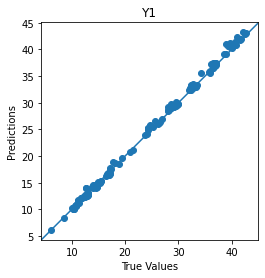

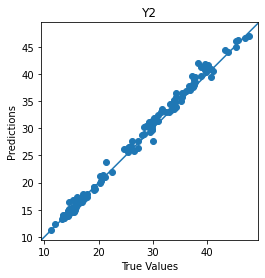

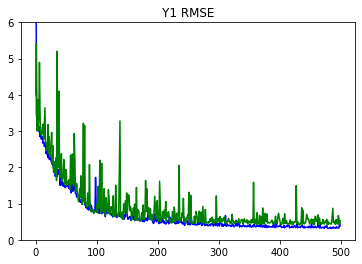

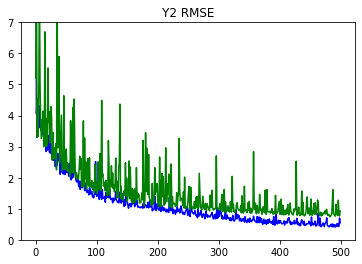

In [17]:
# Test the model and print loss and mse for both outputs
loss, Y1_loss, Y2_loss, Y1_rmse, Y2_rmse = model.evaluate(x=norm_test_X, y=test_Y)
print("Loss = {}, Y1_loss = {}, Y1_mse = {}, Y2_loss = {}, Y2_mse = {}".format(loss, Y1_loss, Y1_rmse, Y2_loss, Y2_rmse))

# Plot the loss and mse
Y_pred = model.predict(norm_test_X)
plot_diff(test_Y[0], Y_pred[0], title='Y1')
plot_diff(test_Y[1], Y_pred[1], title='Y2')
plot_metrics(metric_name='y1_output_root_mean_squared_error', title='Y1 RMSE', ylim=6)
plot_metrics(metric_name='y2_output_root_mean_squared_error', title='Y2 RMSE', ylim=7)

## 013. Multi Input Models : Example -> Siamese

In [19]:
def create_pairs(x, digit_indices):
    '''Positive and negative pair creation.
    Alternates between positive and negative pairs.
    '''
    pairs = []
    labels = []
    n = min([len(digit_indices[d]) for d in range(10)]) - 1
    
    for d in range(10):
        for i in range(n):
            z1, z2 = digit_indices[d][i], digit_indices[d][i + 1]
            pairs += [[x[z1], x[z2]]]
            inc = random.randrange(1, 10)
            dn = (d + inc) % 10
            z1, z2 = digit_indices[d][i], digit_indices[dn][i]
            pairs += [[x[z1], x[z2]]]
            labels += [1, 0]
            
    return np.array(pairs), np.array(labels)


def create_pairs_on_set(images, labels):
    
    digit_indices = [np.where(labels == i)[0] for i in range(10)]
    pairs, y = create_pairs(images, digit_indices)
    y = y.astype('float32')
    
    return pairs, y


def show_image(image):
    plt.figure()
    plt.imshow(image)
    plt.colorbar()
    plt.grid(False)
    plt.show()

In [22]:
# load the dataset
(train_images, train_labels), (test_images, test_labels) = tfds.fashion_mnist.load_data()

# prepare train and test sets
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

# normalize values
train_images = train_images / 255.0
test_images = test_images / 255.0

# create pairs on train and test sets
tr_pairs, tr_y = create_pairs_on_set(train_images, train_labels)
ts_pairs, ts_y = create_pairs_on_set(test_images, test_labels)

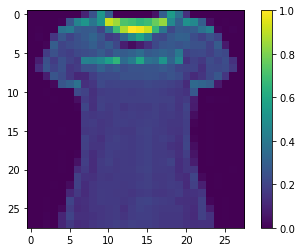

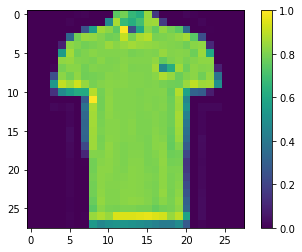

1.0


In [23]:
# array index
this_pair = 8

# show images at this index
show_image(ts_pairs[this_pair][0])
show_image(ts_pairs[this_pair][1])

# print the label for this pair
print(ts_y[this_pair])

In [24]:
def initialize_base_network():
    input = Input(shape=(28,28,), name="base_input")
    x = Flatten(name="flatten_input")(input)
    x = Dense(128, activation='relu', name="first_base_dense")(x)
    x = Dropout(0.1, name="first_dropout")(x)
    x = Dense(128, activation='relu', name="second_base_dense")(x)
    x = Dropout(0.1, name="second_dropout")(x)
    x = Dense(128, activation='relu', name="third_base_dense")(x)

    return Model(inputs=input, outputs=x)


def euclidean_distance(vects):
    x, y = vects
    sum_square = K.sum(K.square(x - y), axis=1, keepdims=True)
    return K.sqrt(K.maximum(sum_square, K.epsilon()))


def eucl_dist_output_shape(shapes):
    shape1, shape2 = shapes
    return (shape1[0], 1)

In [26]:
base_network = initialize_base_network()


In [27]:
base_network.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 base_input (InputLayer)     [(None, 28, 28)]          0         
                                                                 
 flatten_input (Flatten)     (None, 784)               0         
                                                                 
 first_base_dense (Dense)    (None, 128)               100480    
                                                                 
 first_dropout (Dropout)     (None, 128)               0         
                                                                 
 second_base_dense (Dense)   (None, 128)               16512     
                                                                 
 second_dropout (Dropout)    (None, 128)               0         
                                                                 
 third_base_dense (Dense)    (None, 128)               1651

In [28]:
# create the left input and point to the base network
input_a = Input(shape=(28,28,), name="left_input")
vect_output_a = base_network(input_a)

# create the right input and point to the base network
input_b = Input(shape=(28,28,), name="right_input")
vect_output_b = base_network(input_b)

# measure the similarity of the two vector outputs
output = Lambda(euclidean_distance, name="output_layer", output_shape=eucl_dist_output_shape)([vect_output_a, vect_output_b])

# specify the inputs and output of the model
model = Model([input_a, input_b], output)

# plot model graph
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 left_input (InputLayer)        [(None, 28, 28)]     0           []                               
                                                                                                  
 right_input (InputLayer)       [(None, 28, 28)]     0           []                               
                                                                                                  
 model_2 (Functional)           (None, 128)          133504      ['left_input[0][0]',             
                                                                  'right_input[0][0]']            
                                                                                                  
 output_layer (Lambda)          (None, 1)            0           ['model_2[0][0]',          

In [ ]:
## To parameterize the loss function, either use the wrapper syntax or use a class

def contrastive_loss_with_margin(margin): # creating a custom loss function
    def contrastive_loss(y_true, y_pred):
        '''Contrastive loss from Hadsell-et-al.'06
        http://yann.lecun.com/exdb/publis/pdf/hadsell-chopra-lecun-06.pdf
        '''
        square_pred = K.square(y_pred)
        margin_square = K.square(K.maximum(margin - y_pred, 0))
        return (y_true * square_pred + (1 - y_true) * margin_square)
    return contrastive_loss




In [5]:
class Contrastive_loss_with_margin(Loss):
    threshold = 1
    def __init__(self,threshold):
        super().__init__()
        self.threshold = threshold
        
    def call(self, y_true, y_pred):
        square_pred = K.square(y_pred)
        margin_square = K.square(K.maximum(margin - y_pred, 0))
        return (y_true * square_pred + (1 - y_true) * margin_square)

In [ ]:
rms = RMSprop()
model.compile(loss=contrastive_loss_with_margin(margin=1), optimizer=rms) # use the loss func
history = model.fit([tr_pairs[:,0], tr_pairs[:,1]], tr_y, epochs=20, batch_size=128, validation_data=([ts_pairs[:,0], ts_pairs[:,1]], ts_y))

In [ ]:
def compute_accuracy(y_true, y_pred):
    '''Compute classification accuracy with a fixed threshold on distances.
    '''
    pred = y_pred.ravel() < 0.5
    return np.mean(pred == y_true)

loss = model.evaluate(x=[ts_pairs[:,0],ts_pairs[:,1]], y=ts_y)

y_pred_train = model.predict([tr_pairs[:,0], tr_pairs[:,1]])
train_accuracy = compute_accuracy(tr_y, y_pred_train)

y_pred_test = model.predict([ts_pairs[:,0], ts_pairs[:,1]])
test_accuracy = compute_accuracy(ts_y, y_pred_test)

print("Loss = {}, Train Accuracy = {} Test Accuracy = {}".format(loss, train_accuracy, test_accuracy))

def plot_metrics(metric_name, title, ylim=5):
    plt.title(title)
    plt.ylim(0,ylim)
    plt.plot(history.history[metric_name],color='blue',label=metric_name)
    plt.plot(history.history['val_' + metric_name],color='green',label='val_' + metric_name)


plot_metrics(metric_name='loss', title="Loss", ylim=0.2)

# Matplotlib config
def visualize_images():
    plt.rc('image', cmap='gray_r')
    plt.rc('grid', linewidth=0)
    plt.rc('xtick', top=False, bottom=False, labelsize='large')
    plt.rc('ytick', left=False, right=False, labelsize='large')
    plt.rc('axes', facecolor='F8F8F8', titlesize="large", edgecolor='white')
    plt.rc('text', color='a8151a')
    plt.rc('figure', facecolor='F0F0F0')# Matplotlib fonts


# utility to display a row of digits with their predictions
def display_images(left, right, predictions, labels, title, n):
    plt.figure(figsize=(17,3))
    plt.title(title)
    plt.yticks([])
    plt.xticks([])
    plt.grid(None)
    left = np.reshape(left, [n, 28, 28])
    left = np.swapaxes(left, 0, 1)
    left = np.reshape(left, [28, 28*n])
    plt.imshow(left)
    plt.figure(figsize=(17,3))
    plt.yticks([])
    plt.xticks([28*x+14 for x in range(n)], predictions)
    for i,t in enumerate(plt.gca().xaxis.get_ticklabels()):
        if predictions[i] > 0.5: t.set_color('red') # bad predictions in red
    plt.grid(None)
    right = np.reshape(right, [n, 28, 28])
    right = np.swapaxes(right, 0, 1)
    right = np.reshape(right, [28, 28*n])
    plt.imshow(right)

